In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Part 1: Minimum-Tracking-Error Frontier

In [2]:
df_1 = pd.read_excel("Industry_Portfolios.xlsx").set_index("Date")
df_2 = pd.read_excel("Market_Portfolio.xlsx").set_index("Date")
df = pd.merge(df_1,df_2,left_index=True, right_index=True)

In [3]:
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Date,,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17


In [4]:
#calculate the tracking error [Ri - Rm]
for i in np.arange(10):
    df.iloc[:,i] = df.iloc[:,i] - df.iloc[:,10] 

In [5]:
df = df.drop("Market", axis = 1)

In [6]:
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [7]:
# change the percenrtage
df = df/100
df.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.0216,-0.0329,-0.0284,-0.0178,0.0231,-0.0081,-0.0177,0.0087,-0.0030,0.0066
200402,0.0279,-0.0153,0.0049,0.0323,-0.0438,-0.0198,0.0463,-0.0057,0.0061,0.0070
200403,0.0114,0.0008,0.0096,0.0110,-0.0132,-0.0084,0.0152,-0.0273,0.0236,0.0060
200404,0.0317,0.0405,0.0158,0.0427,-0.0316,0.0127,-0.0095,0.0529,-0.0180,-0.0201
200405,-0.0312,-0.0287,0.0038,-0.0084,0.0362,-0.0418,-0.0093,-0.0165,0.0005,0.0063


In [8]:
#calculate covariance matrix
cov_matrix = df.cov()
cov_matrix

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.000544,-0.000607,-0.000140,-0.000120,-0.000188,0.000154,0.000114,0.000382,0.000427,-0.000177
Durbl,-0.000607,0.002663,0.000491,-0.000348,0.000189,-0.000171,-0.000035,-0.000808,-0.000962,0.000439
Manuf,-0.000140,0.000491,0.000295,0.000167,0.000007,-0.000063,-0.000115,-0.000229,-0.000190,0.000036
Enrgy,-0.000120,-0.000348,0.000167,0.001927,-0.000152,-0.000104,-0.000371,-0.000249,0.000445,-0.000386
HiTec,-0.000188,0.000189,0.000007,-0.000152,0.000510,-0.000077,-0.000025,-0.000194,-0.000234,-0.000140
Telcm,0.000154,-0.000171,-0.000063,-0.000104,-0.000077,0.000468,0.000046,0.000069,0.000272,-0.000127
Shops,0.000114,-0.000035,-0.000115,-0.000371,-0.000025,0.000046,0.000445,0.000076,-0.000018,-0.000026
Hlth,0.000382,-0.000808,-0.000229,-0.000249,-0.000194,0.000069,0.000076,0.000782,0.000350,-0.000173
Utils,0.000427,-0.000962,-0.000190,0.000445,-0.000234,0.000272,-0.000018,0.000350,0.001227,-0.000406
Other,-0.000177,0.000439,0.000036,-0.000386,-0.000140,-0.000127,-0.000026,-0.000173,-0.000406,0.000450


In [9]:
#Calculate the mean and standard deviation of the tracking error
data_df_std = df.std()
data_df_return = df.mean()
assets = pd.concat([data_df_return, data_df_std], axis = 1)
assets.columns = ["Returns", "Volatility"]
print("Mean Return and Standard Deviation of 10 portfolio's Tracking-Error")
assets

Mean Return and Standard Deviation of 10 portfolio's Tracking-Error


,Returns,Volatility
NoDur,0.001547,0.023323
Durbl,-0.000147,0.051603
Manuf,0.002648,0.017177
Enrgy,0.004831,0.043903
HiTec,0.000182,0.022580
Telcm,0.001333,0.021639
Shops,0.001683,0.021101
Hlth,0.000358,0.027965
Utils,0.001591,0.035025
Other,-0.002590,0.021221


### Calculate α , ζ and δ using formula

In [10]:
e = np.asmatrix(np.ones(10, dtype = int)).T
R = np.asmatrix(assets['Returns'].values).T
V = np.matrix(cov_matrix.values)
V_invert = np.linalg.inv(V)

In [11]:
Alpha = R.T*V_invert*e
Alpha = Alpha.sum()
Alpha

293.2127882630597

In [12]:
Zeta = R.T*V_invert*R
Zeta= Zeta.sum()
Zeta

0.20474497351129956

In [13]:
Delta = e.T*V_invert*e
Delta = Delta.sum()
Delta

585502.543763984

In [14]:
Rmv = (Alpha / Delta)
Rmv

0.0005007882397540082

### Calculate a and b using formula

**w* = a + b * Rp**

In [15]:
a = (Zeta*V_invert*e - Alpha*V_invert*R) / (Zeta*Delta - Alpha**2)

In [16]:
b = (Delta*V_invert*R - Alpha*V_invert*e) / (Zeta*Delta - Alpha**2)

### Define Rp range and calculate respective opimal portfolio weight and standard deviation

In [17]:
#define the range of Return on Portfolio
Rp_array = np.arange(0,0.00105,0.00005)
list_of_Rp = list(Rp_array)

In [18]:
# calculate the respective optimal weight based on Rp
list_of_optimal_weight = []
for Rp in list_of_Rp:
    w = a + b*Rp
    list_of_optimal_weight.append(w)

In [19]:
# calculate the corresponding portfolio variance based on optimal weight and covariance matrix
list_of_Variance = []
for w in list_of_optimal_weight:
    variance = w.T*V*w
    list_of_Variance.append(variance.sum())

In [20]:
# calculate standard deviation of optimal portfolio by sqrt the variance
list_of_std = np.sqrt(list_of_Variance)

In [21]:
# Lower Bound of the Frontier
Rp_array_bottom = list(np.arange(0,Rmv,0.00005))

list_of_optimal_weight_Bottom = []
for Rp in Rp_array_bottom:
    w = a + b*Rp
    list_of_optimal_weight_Bottom.append(w)

list_of_Std_Bottom = []
for w in list_of_optimal_weight_Bottom:
    variance = w.T*V*w
    std = np.sqrt(variance.sum())
    list_of_Std_Bottom.append(std)


### Plot Effecient Frontier

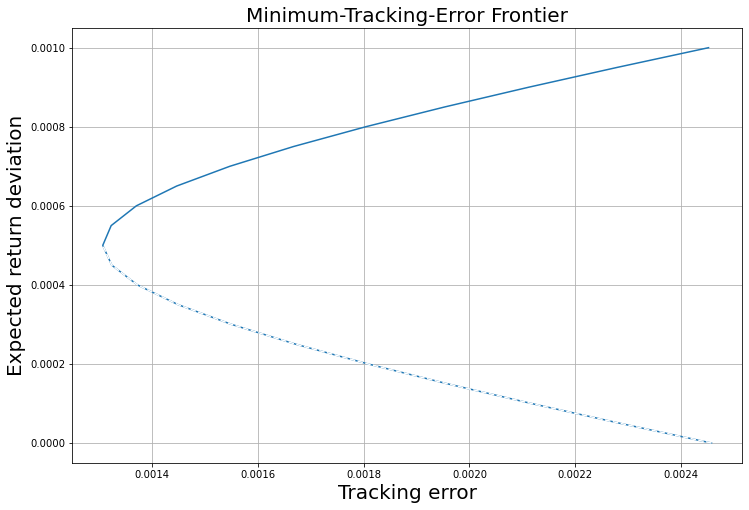

In [22]:
plt.figure(figsize = (12,8))
plt.plot(list_of_std, list_of_Rp)
plt.plot(list_of_Std_Bottom, Rp_array_bottom, "--", color = "white")# Lowerbound of the Frontier

plt.title("Minimum-Tracking-Error Frontier", fontsize = 20)
plt.xlabel("Tracking error", fontsize = 20)
plt.ylabel("Expected return deviation", fontsize = 20)
plt.grid(True)
plt.show()

### With Riskless Assets

In [23]:
#define Riskfree Rate
Rf = 0

In [24]:
# define the range of Portfolio return (between risk free rate 0.13% to 2%)
R_1 = list(np.arange(Rf,0.00105,0.00005))

In [25]:
# calculate the respective std based on defiend Portfolio Return
std_1 = []
for r in np.arange(Rf,0.00105,0.00005):
    v = (r - Rf)**2 / (Zeta - 2*Alpha*Rf + Delta* (Rf**2))
    std_1.append(np.sqrt(v))

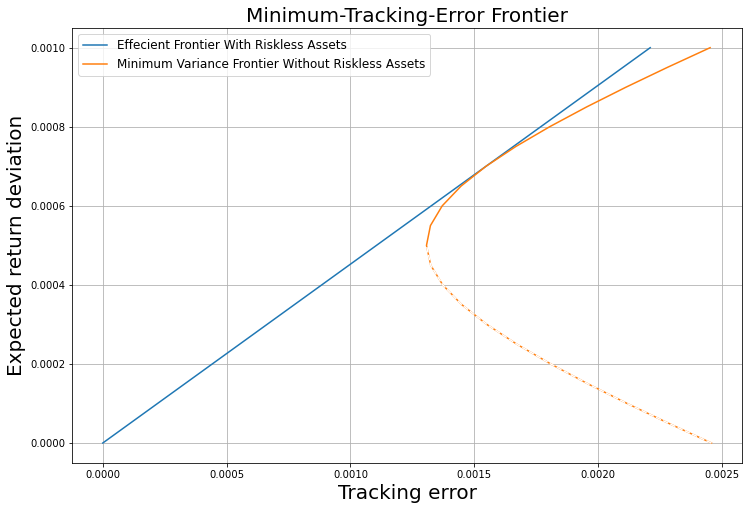

In [26]:
plt.figure(figsize = (12,8))
plt.plot(std_1, R_1, label = "Effecient Frontier With Riskless Assets") # With Riskless Assets
plt.plot(list_of_std, list_of_Rp, label = "Minimum Variance Frontier Without Riskless Assets") # Without Riskless Assets
plt.plot(list_of_Std_Bottom, Rp_array_bottom, "--", color = "white") # Lowerbound of the Frontier

plt.title("Minimum-Tracking-Error Frontier", fontsize = 20)
plt.xlabel("Tracking error", fontsize = 20)
plt.ylabel("Expected return deviation", fontsize = 20)
plt.grid(True)
plt.legend(fontsize = 12)
plt.show()

### Tangency Portfolio

In [27]:
#Return of Tangency Portfolio
Rtg = (Alpha * Rf - Zeta) / (Delta * Rf - Alpha)
Rtg

0.0006982811859065639

In [28]:
Rtg

0.0006982811859065639

In [29]:
#Information Ratio of Tangency Porfolio
Information_Ratio = (Zeta - 2*Alpha*Rf + Delta*(Rf**2))**0.5
Information_Ratio 

0.45248753961993204

In [30]:
#Portfolio Weight of Tangency Portfolio
w_tg = a + b*Rtg
tgp = pd.DataFrame(w_tg, columns =["Tangency Portfolio Weight"])
tgp.set_index(cov_matrix.index)

,Tangency Portfolio Weight
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


In [31]:
variance_tg = w_tg.T*V*w_tg
std_tg = np.sqrt(variance_tg)

In [32]:
# std_tg = -((Zeta - 2*Alpha*Rf + Delta*(Rf**2))**0.5)/(Delta*(Rf - Rmv))

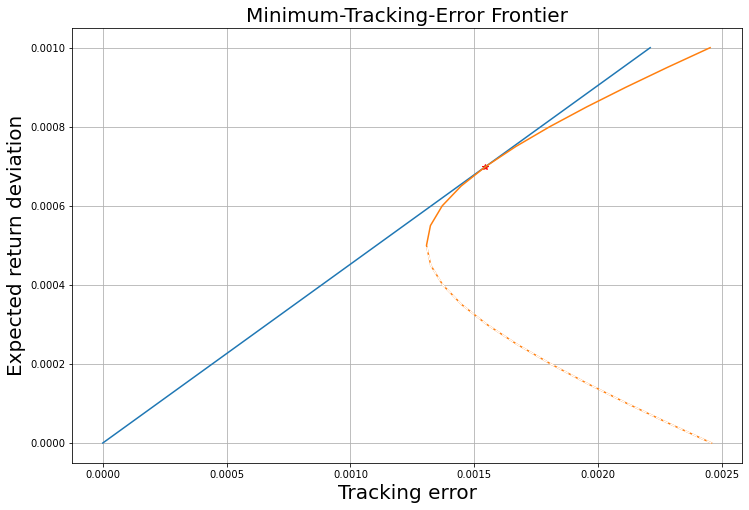

In [33]:
plt.figure(figsize=(12,8))

plt.plot(std_tg, Rtg, "*", color = "red", label = "Tangency Portfolio")
plt.plot(std_1, R_1, label = "Effecient Frontier With Riskless Assets") # With Riskless Assets
plt.plot(list_of_std, list_of_Rp, label = "Minimum Variance Frontier Without Riskless Assets") # Without Riskless Assets
plt.plot(list_of_Std_Bottom, Rp_array_bottom, "--", color = "white") # Lowerbound of the Frontier

plt.title("Minimum-Tracking-Error Frontier", fontsize = 20)
plt.xlabel("Tracking error", fontsize = 20)
plt.ylabel("Expected return deviation", fontsize = 20)
#plt.legend(fontsize = 12)
plt.grid()
plt.show()

### Part 2: Hansen–Jagannathan Bound

In [34]:
# Simulate 𝜺 with 10^4 random draws from a standard normal distribution
mu, sigma = 0, 1 # mean and standard deviation
e = np.random.normal(mu, sigma, 10**4)

In [35]:
# Simulate 𝝂 with 10^4 random draws from a standard uniform distribution. 
random_probability = np.random.random(10**4)

v = np.zeros(10**4)

for i in np.arange(10**4):
    if random_probability[i] <= 0.017:
        v[i] = np.log(0.65)

In [36]:
ln_g = 0.02 + 0.02*e + v

In [37]:
g = np.exp(ln_g)

In [38]:
gamma = np.arange(1,4.005,0.005)

In [39]:
mean_M = []
std_M = []
ratios = []
for i in gamma:
    M = 0.99 * (g**(-i))
    ratio = M.std() / M.mean()
    ratios.append(ratio)
    mean_M.append(M.mean())
    std_M.append(M.std())
# ratio = [std / mean for std, mean in zip(std_M, mean_M)]

In [40]:
Hansen_J = pd.DataFrame([gamma, ratios]).T

In [41]:
Hansen_J.columns = (["Gamma","Ratios"])

In [42]:
Minimum_Gamma = Hansen_J[Hansen_J["Ratios"]>0.4].head(1)

In [43]:
Minimum_Gamma

,Gamma,Ratios
456,3.28,0.400491


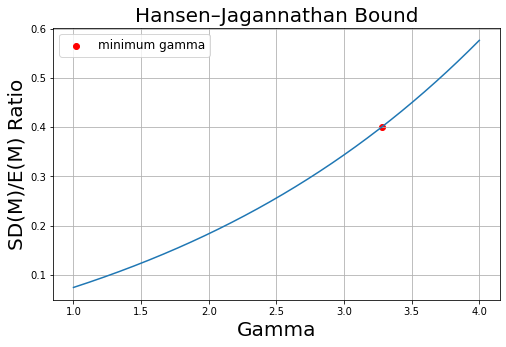

In [44]:
plt.figure(figsize = (8,5))
plt.plot(Hansen_J["Gamma"],Hansen_J["Ratios"]) # With Riskless Assets
plt.scatter(Minimum_Gamma["Gamma"],Minimum_Gamma["Ratios"], color = "red", label = 'minimum gamma')

plt.title("Hansen–Jagannathan Bound", fontsize = 20)
plt.xlabel("Gamma", fontsize = 20)
plt.ylabel("SD(M)/E(M) Ratio", fontsize = 20)
plt.grid(True)
plt.legend(fontsize = 12)
plt.show()